# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

The purpose of the project is to use the existing data to understand if there is any correlation between martial status and credit worthiness as well as number of children and credit worthiness. This project will use the already collected bank data, process it to account for any inconsistencies, and then test for correlations between the variables.

## Open the data file and have a look at the general information. 

In [11]:
import pandas as pd
!pip install pandas
!pip install python-pptx
from pptx import Presentation
from datetime import date

data = pd.read_csv("/Users/macbookpro/Desktop/credit_scoring_eng.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [12]:
print("Number of rows: " + str(data.shape[0]))
print("Number of cols: " + str(data.shape[1]))

Number of rows: 21525
Number of cols: 12


In [13]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


A few things to note just based on the first couple rows: 
1. Inconsistent education categories (i.e. "secondary education" versus "Secondary Education")
2. Negative days of experience

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [15]:
missing = data.isnull().sum().sum()

print("Appears to have " + str(missing) + " missing values in the entire dataframe. The columns that are missing values seem to be days_employed and total_income.")

Appears to have 4348 missing values in the entire dataframe. The columns that are missing values seem to be days_employed and total_income.


In [16]:
print("total_income missing values: " + str(data.total_income.isnull().sum()))
print("days_employed missing values: " + str(data.days_employed.isnull().sum()))
filtered = data[data['total_income'].notna()]
print(filtered.days_employed.isnull().sum())

total_income missing values: 2174
days_employed missing values: 2174
0


**Intermediate conclusion**

It appears that the total_income & days_employed are sysmetrical. Whenever the NaN total_income rows are removed, there are no remaining days_employed NaN rows.

This suggests that there may be certain charasteristics that cause an entry to have both missing total_income and days_employed. I hypothesis that it may be the income type that is causing this. To test this hypothesis, I will group the data by income type and see how many values are missing by income type on a percentage basis.

In [17]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
print(data.groupby('income_type').agg({'total_income': lambda x: x.isnull().sum()/x.count()*100}))

                             total_income
income_type                              
business                        11.098973
civil servant                   11.204268
employee                        11.034552
entrepreneur                   100.000000
paternity / maternity leave      0.000000
retiree                         11.995353
student                          0.000000
unemployed                       0.000000


In [18]:
print(data.groupby('children').agg({'total_income': lambda x: x.isnull().sum()/x.count()*100}))
print(data.groupby('education').agg({'total_income': lambda x: x.isnull().sum()/x.count()*100}))
print(data.groupby('family_status').agg({'total_income': lambda x: x.isnull().sum()/x.count()*100}))

          total_income
children              
-1            6.818182
 0           11.321794
 1           10.937140
 2           11.021070
 3           12.244898
 4           20.588235
 5           12.500000
 20          13.432836
                     total_income
education                        
BACHELOR'S DEGREE        9.163347
Bachelor's Degree       10.288066
GRADUATE DEGREE          0.000000
Graduate Degree          0.000000
PRIMARY EDUCATION        6.250000
Primary Education        7.142857
SECONDARY EDUCATION      9.503546
SOME COLLEGE            31.818182
Secondary Education     10.061920
Some College            17.500000
bachelor's degree       11.747987
graduate degree          0.000000
primary education        8.225108
secondary education     11.408200
some college             8.972268
                   total_income
family_status                  
civil partnership     11.834003
divorced              10.341644
married               11.101140
unmarried             11.405941


**Possible reasons for missing values in data**

After checking a couple some of the key variables it seems that the % NaN is the same (~10%) across the different categories. This leads me to hypothesis that the missing values are random. 

**Intermediate conclusion**
It seems that the hypothesis of family status and education, or children does not have a pattern for NaN total income. Distributions can be used to see if there are any other patterns in the non-discrete categories.

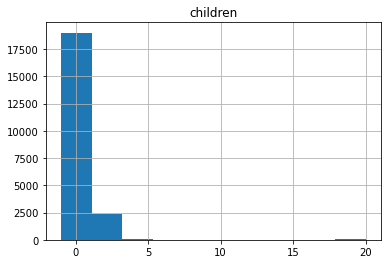

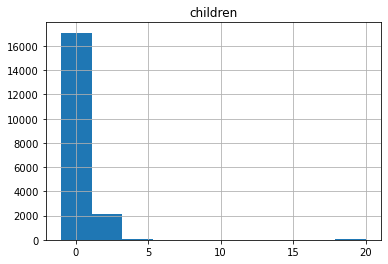

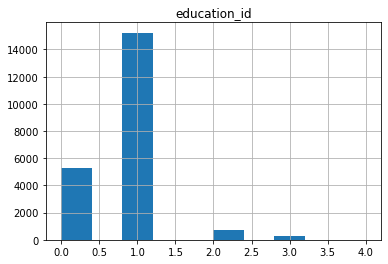

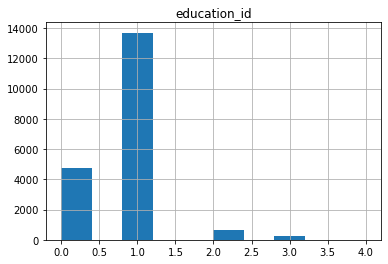

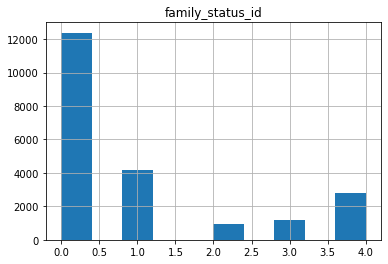

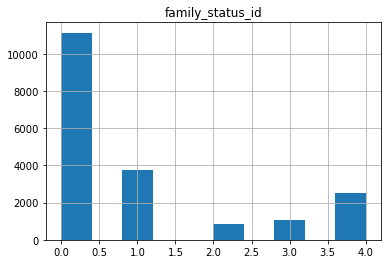

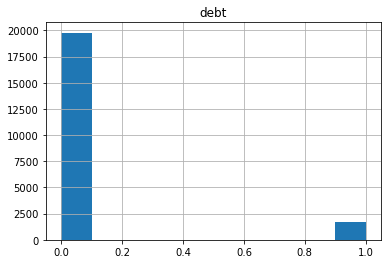

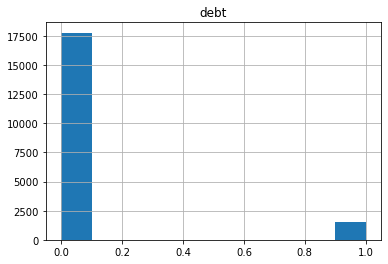

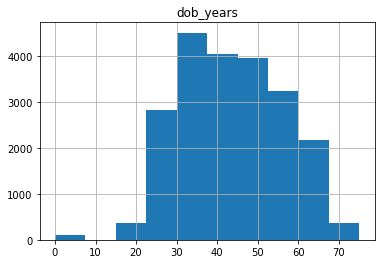

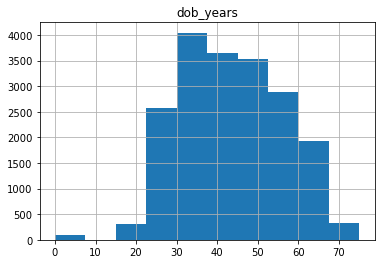

In [19]:
# Check for other reasons and patterns that could lead to missing values
data.hist(column="children");
filtered.hist(column="children");
data.hist(column="education_id");
filtered.hist(column="education_id");
data.hist(column="family_status_id");
filtered.hist(column="family_status_id");
data.hist(column="debt");
filtered.hist(column="debt");
data.hist(column="dob_years");
filtered.hist(column="dob_years");

**Intermediate conclusion**
All of the distributions are the same as shown by the graphs above. This further supports the idea the NaN being random

**Conclusions**

Without additional contextual information, there are not any patterns in the data the explain why the rows without days_employed or total_income have this issue.

## Data transformation

In [20]:
# Let's see all values in education column to check if and what spellings will need to be fixed
print(data['education'].unique())


["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [21]:
# Fix the registers if required
data['education'] = data['education'].str.upper()

In [22]:
# Checking all the values in the column to make sure we fixed them
print(data['education'].unique())

["BACHELOR'S DEGREE" 'SECONDARY EDUCATION' 'SOME COLLEGE'
 'PRIMARY EDUCATION' 'GRADUATE DEGREE']


array([[<AxesSubplot:title={'center':'children'}>]], dtype=object)

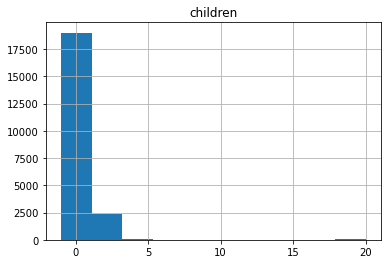

In [23]:
# Let's see the distribution of values in the `children` column
data.hist(column="children")

There are two strange things observed in the histogram:
1. There are entries with -1 children (which is impossible)
2. There are entries with 20 children (not impossible but seems unlikely given that nearly all people have between 0-5 children)

I hypothesis that these errors occured by manual data entry mistakes: 
1. The 20 should be a 2; A 0 was accidentally appended when updating
2. The -1 should be 1; A - was accidentally appended when updating

In [24]:
# [fix the data based on your decision]
data.loc[data.children <0, 'children'] = data.children*-1
data.loc[data.children ==20, 'children'] = 2

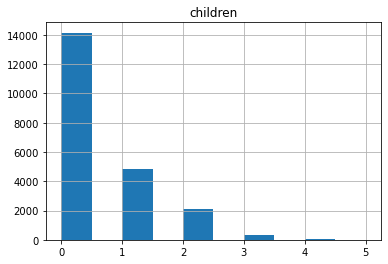

In [25]:
# Checking the `children` column again to make sure it's all fixed
data['children'].value_counts(dropna=False)
data.hist(column="children");

The potential issues with days_employed are potenital imposible entries such as:
1. Negative days_employed
2. Being employed for an unrealistic amount of time (i.e. over 80 years)

days_employed < 0: 82.19730246498888%
days_employed > 80 yrs: 17.80269753501111%


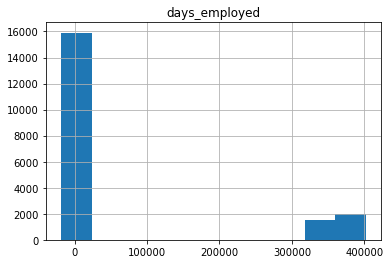

In [26]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
data.hist(column="days_employed");
total = data["days_employed"].count()
print("days_employed < 0: " + str(data[(data["days_employed"]<0)]["days_employed"].count()/total*100)+"%")
print("days_employed > 80 yrs: " + str(data[(data["days_employed"]>80*365)]["days_employed"].count()/total*100)+"%")

I hypothesize that the negative values were intended to be positive, and the excessively large values are entered in hours instead of days.

In [27]:
# Address the problematic values, if they exist
data.loc[data.days_employed <0, 'days_employed'] = data.days_employed*-1
data.loc[data.days_employed > 80*365, 'days_employed'] = data.days_employed/24


days_employed < 0: 0
days_employed > 80 yrs: 0


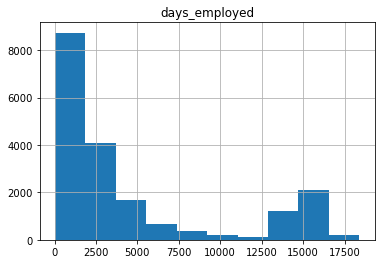

In [28]:
# Check the result - make sure it's fixed
data.hist(column="days_employed");
print("days_employed < 0: " + str(data[(data["days_employed"]<0)]["days_employed"].count()))
print("days_employed > 80 yrs: " + str(data[(data["days_employed"]>80*365)]["days_employed"].count()))

101

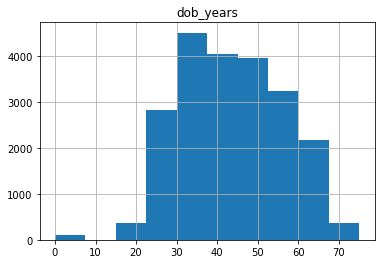

In [29]:
# Check the `dob_years` for suspicious values and count the percentage
data.hist(column="dob_years");
data.loc[data.dob_years==0, 'dob_years'].count()

There is a problem where 101 entries have an age of 0. Since this is such a small portion of the data set, it is best to drop these rows since it would be arbitrary to assign ages to these rows.

In [30]:
# Address the issues in the `dob_years` column, if they exist
data.drop(data.loc[data['dob_years']==0].index, inplace=True)

0

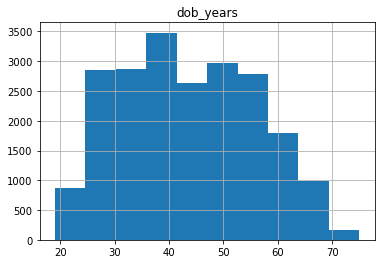

In [31]:
# Check the result - make sure it's fixed
data.hist(column="dob_years");
data.loc[data.dob_years==0, 'dob_years'].count()

In [32]:
# Let's see the values for the column
print(data['family_status'].value_counts(dropna=False))

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64


The values in the family_status column seem ok. 

In [33]:
# Let's see the values in the column
print(data['gender'].value_counts(dropna=False))

F      14164
M       7259
XNA        1
Name: gender, dtype: int64


There is one value that is an unknown data, XNA. This will not be useful in proving the hypothesis since it can not be extrapolated and could skew the results. It is a small enough relative to the size of the dataset that it should not cause a problem

In [34]:
# Address the problematic values, if they exist
data = data[data.gender != "XNA"]

In [35]:
# Check the result - make sure it's fixed
print(data['gender'].value_counts(dropna=False))

F    14164
M     7259
Name: gender, dtype: int64


In [36]:
# Let's see the values in the column
data["income_type"].value_counts(dropna=False)

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

There doesn't seem to be any problem with the income_type column.


In [37]:
# Checking duplicates
print(data.duplicated().sum())
print(data['total_income'].value_counts(dropna=False))

71
NaN          2164
42413.096       2
17312.717       2
31791.384       2
40620.102       1
             ... 
9606.294        1
28156.762       1
24931.195       1
32346.594       1
13127.587       1
Name: total_income, Length: 19257, dtype: int64


There are 71 duplicates and they all are missing total_income values. It is difficult to distinguish if these are true duplicates are not, but since we will later have to fill these values in, it is best to drop the duplicates for now since it is such a small portion of the data set.

In [38]:
# Address the duplicates, if they exist
data = data.drop_duplicates()

In [39]:
# Last check whether we have any duplicates
print(data.duplicated().sum())

0


In [40]:
# Check the size of the dataset that you now have after your first manipulations with it
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21352 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      19259 non-null  float64
 11  purpose           21352 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Originally there was 21525 rows of data and now there are 21352. This means that about 1% of data was removed for the following reasons:
1. Duplicates
2. XNA gender
3. 0 age

# Working with missing values

I chose not to work with dictionaries to fill the missing values.

### Restoring missing values in `total_income`

The columns total_income and days_employed columns are missing values. To fix this, I will find means/medians based on some key factors and fill them in with the missing values.

In [41]:
# Let's write a function that calculates the age category

def ageGroup(age):
    if age < 20:
        return "< 20 yo"
    elif age < 30:
        return "20 - 29 yo"
    elif age < 40:
        return "30 - 39 yo"
    elif age < 50:
        return "40 - 49 yo"
    elif age < 60:
        return "50 - 59 yo"
    else:
        return "> 60 yo"

In [42]:
# Test if the function works
print(ageGroup(18),ageGroup(24),ageGroup(35),ageGroup(46),ageGroup(57),ageGroup(68))

< 20 yo 20 - 29 yo 30 - 39 yo 40 - 49 yo 50 - 59 yo > 60 yo


In [43]:
# Creating new column based on function
data['age_group'] = data['dob_years'].apply(ageGroup)

In [44]:
# Checking how values in the new column
data['age_group'].value_counts(dropna=False)

30 - 39 yo    5662
40 - 49 yo    5354
50 - 59 yo    4657
20 - 29 yo    3165
> 60 yo       2500
< 20 yo         14
Name: age_group, dtype: int64

The factors I will analyze to determine how to restore the missing values for total_income are age group, education, income_type, and gender because these factors usually have the greatest impact on income.

In [45]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
filtered = data.dropna(subset=['total_income'])
print(filtered.head())

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028         42    BACHELOR'S DEGREE             0   
1         1    4024.803754         36  SECONDARY EDUCATION             1   
2         0    5623.422610         33  SECONDARY EDUCATION             1   
3         3    4124.747207         32  SECONDARY EDUCATION             1   
4         0   14177.753002         53  SECONDARY EDUCATION             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose   age_group  
0    purchase o

In [46]:
## Would need to pip install pandasgui for a hands on table for diff views ## 
#from pandasgui import show
#show(filtered)

In [47]:
# Look at the mean values for income based on your identified factors
filtered_mean = filtered.groupby(['age_group'])['total_income'].mean().reset_index()
print(filtered_mean.head())
filtered_mean = filtered.groupby(['education'])['total_income'].mean().reset_index()
print(filtered_mean.head())
filtered_mean = filtered.groupby(['gender'])['total_income'].mean().reset_index()
print(filtered_mean.head())
filtered_mean = filtered.groupby(['income_type'])['total_income'].mean().reset_index()
print(filtered_mean.head())
filtered_mean = filtered.groupby(['age_group','income_type','education','gender'])['total_income'].mean().reset_index()
print(filtered_mean.head())

    age_group  total_income
0  20 - 29 yo  25570.172966
1  30 - 39 yo  28312.479963
2  40 - 49 yo  28551.375635
3  50 - 59 yo  25811.700327
4     < 20 yo  16993.942462
             education  total_income
0    BACHELOR'S DEGREE  33172.428387
1      GRADUATE DEGREE  27960.024667
2    PRIMARY EDUCATION  21144.882211
3  SECONDARY EDUCATION  24600.353617
4         SOME COLLEGE  29035.057865
  gender  total_income
0      F  24664.752169
1      M  30905.772981
                   income_type  total_income
0                     business  32397.307219
1                civil servant  27361.316126
2                     employee  25824.679592
3                 entrepreneur  79866.103000
4  paternity / maternity leave   8612.661000
    age_group income_type            education gender  total_income
0  20 - 29 yo    business    BACHELOR'S DEGREE      F  29474.189550
1  20 - 29 yo    business    BACHELOR'S DEGREE      M  37101.643900
2  20 - 29 yo    business    PRIMARY EDUCATION      F  12663.581000

In [48]:
# Look at the median values for income based on your identified factors
filtered_median = filtered.groupby(['age_group'])['total_income'].median().reset_index()
print(filtered_median.head())
filtered_median = filtered.groupby(['education'])['total_income'].median().reset_index()
print(filtered_median.head())
filtered_median = filtered.groupby(['gender'])['total_income'].median().reset_index()
print(filtered_median.head())
filtered_median = filtered.groupby(['income_type'])['total_income'].median().reset_index()
print(filtered_median.head())
filtered_median = filtered.groupby(['age_group','income_type','education','gender'])['total_income'].median().reset_index()
print(filtered_median.head())


    age_group  total_income
0  20 - 29 yo    22798.6650
1  30 - 39 yo    24667.5280
2  40 - 49 yo    24764.2290
3  50 - 59 yo    22203.0745
4     < 20 yo    14934.9010
             education  total_income
0    BACHELOR'S DEGREE    28054.5310
1      GRADUATE DEGREE    25161.5835
2    PRIMARY EDUCATION    18741.9760
3  SECONDARY EDUCATION    21839.4075
4         SOME COLLEGE    25608.7945
  gender  total_income
0      F    21469.0015
1      M    26819.5670
                   income_type  total_income
0                     business    27563.0285
1                civil servant    24083.5065
2                     employee    22815.1035
3                 entrepreneur    79866.1030
4  paternity / maternity leave     8612.6610
    age_group income_type            education gender  total_income
0  20 - 29 yo    business    BACHELOR'S DEGREE      F    26928.3970
1  20 - 29 yo    business    BACHELOR'S DEGREE      M    32319.5335
2  20 - 29 yo    business    PRIMARY EDUCATION      F    12663.5810

In [49]:
## Correlation Matrix ##
#df_trim = filtered[['total_income','age_group']]
#import matplotlib.pyplot as plt
#import seaborn as sns
#trim_corr = df_trim.corr()
#ax = sns.heatmap(
    #trim_corr, 
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
#)
#ax.set_xticklabels(
    #ax.get_xticklabels(),
    #rotation=45,
    #horizontalalignment='right'
#)

The characteristics I identified all have a major impact on total_income. I will use the median number because there seems to be some outliers in the data set:

In [50]:
print(filtered['total_income'].max())
print(filtered['total_income'].min())
print(filtered['total_income'].mean())
print(filtered['total_income'].median())

362496.645
3306.762
26794.13312077475
23200.877


In [51]:
#  Write a function that we will use for filling in missing values
        
def fillValues(age_group,income_type,education, gender):
    df = filtered[(filtered["age_group"]==age_group) & (filtered["income_type"]==income_type) & (filtered["education"]==education) & (filtered["gender"]==gender)]
    return df["total_income"].median()

In [52]:
# Check if it works
print(fillValues("20 - 29 yo","business","SECONDARY EDUCATION","F"))
print(fillValues("20 - 29 yo","business","SECONDARY EDUCATION","M"))
print(fillValues("20 - 29 yo","employee","SECONDARY EDUCATION","F"))

21079.3665
27075.362500000003
17257.292999999998


In [53]:
## Adding from instructor feedback ##
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Apply it to every row
to_fill = data[data['total_income'].isnull()]
to_fill['total_income'] = to_fill.apply(lambda row: fillValues(row['age_group'],row['income_type'],row['education'],row['gender']), axis=1)

In [55]:
# Check if we got any errors
print(to_fill['total_income'].isnull().sum())
errors = to_fill[to_fill['total_income'].isnull()]
print(errors.head())

3
       children  days_employed  dob_years          education  education_id  \
5936          0            NaN         58  BACHELOR'S DEGREE             0   
8142          0            NaN         64  PRIMARY EDUCATION             3   
18739         0            NaN         62       SOME COLLEGE             2   

           family_status  family_status_id gender    income_type  debt  \
5936             married                 0      M   entrepreneur     0   
8142   civil partnership                 1      F  civil servant     0   
18739  civil partnership                 1      M       business     0   

       total_income                      purpose   age_group  
5936            NaN  buy residential real estate  50 - 59 yo  
8142            NaN            to have a wedding     > 60 yo  
18739           NaN            to have a wedding     > 60 yo  


There are 3 NaN left. This is because there are no other data that match the parameters identified to calculate the median off of. Because this is such a small number of rows they will be dropped from the set.


In [56]:
# Replacing missing values if there are any errors
to_fill = to_fill[to_fill['total_income'].notna()]

In [57]:
# Checking the number of entries in the columns
to_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 12 to 21510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2090 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2090 non-null   int64  
 3   education         2090 non-null   object 
 4   education_id      2090 non-null   int64  
 5   family_status     2090 non-null   object 
 6   family_status_id  2090 non-null   int64  
 7   gender            2090 non-null   object 
 8   income_type       2090 non-null   object 
 9   debt              2090 non-null   int64  
 10  total_income      2090 non-null   float64
 11  purpose           2090 non-null   object 
 12  age_group         2090 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 228.6+ KB


###  Restoring values in `days_employed`

For days_employed, I think the variables that would matter most are the income_type and age_group

In [58]:
# Distribution of `days_employed` medians based on your identified parameters

df = filtered.groupby('income_type')['days_employed'].median()
print(df)
df = filtered.groupby('age_group')['days_employed'].median()
print(df)

income_type
business                        1548.009883
civil servant                   2673.404956
employee                        1576.067689
entrepreneur                     520.848083
paternity / maternity leave     3296.759962
retiree                        15215.680699
student                          578.751554
unemployed                     15267.235531
Name: days_employed, dtype: float64
age_group
20 - 29 yo     1004.573780
30 - 39 yo     1601.784231
40 - 49 yo     2111.489906
50 - 59 yo     4796.767897
< 20 yo         724.492610
> 60 yo       14815.302792
Name: days_employed, dtype: float64


In [59]:
# Distribution of `days_employed` means based on your identified parameters
df = filtered.groupby('income_type')['days_employed'].mean()
print(df)
df = filtered.groupby('age_group')['days_employed'].mean()
print(df)

income_type
business                        2112.744402
civil servant                   3388.508552
employee                        2328.603723
entrepreneur                     520.848083
paternity / maternity leave     3296.759962
retiree                        15208.988648
student                          578.751554
unemployed                     15267.235531
Name: days_employed, dtype: float64
age_group
20 - 29 yo     1245.844393
30 - 39 yo     2103.700591
40 - 49 yo     3065.967424
50 - 59 yo     7541.593571
< 20 yo         633.678086
> 60 yo       12743.739504
Name: days_employed, dtype: float64


Based on this analysis it makes the most sense to use the age_group to assign days_employed. I am choosing to use the mean in this case because it doesn't seem that outliers have a large influence here.

In [60]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
def fillDaysValues(age_group):
    df = filtered[(filtered["age_group"]==age_group)]
    return df['days_employed'].mean()
    

In [61]:
# Check that the function works
print(fillDaysValues('20 - 29 yo'),fillDaysValues('> 60 yo'))


1245.8443926168516 12743.739503992949


In [62]:
# Apply function
to_fill['days_employed'] = to_fill.apply(lambda row: fillDaysValues(row['age_group']), axis=1)

In [63]:
# Check if function worked
print(to_fill['days_employed'].isnull().sum())
errors = to_fill[to_fill['days_employed'].isnull()]
print(errors.head())

0
Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, age_group]
Index: []


In [64]:
# Check the entries in all columns - make sure we fixed all missing values
frames = [filtered, to_fill]
data = pd.concat(frames)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21349 entries, 0 to 21510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21349 non-null  int64  
 1   days_employed     21349 non-null  float64
 2   dob_years         21349 non-null  int64  
 3   education         21349 non-null  object 
 4   education_id      21349 non-null  int64  
 5   family_status     21349 non-null  object 
 6   family_status_id  21349 non-null  int64  
 7   gender            21349 non-null  object 
 8   income_type       21349 non-null  object 
 9   debt              21349 non-null  int64  
 10  total_income      21349 non-null  float64
 11  purpose           21349 non-null  object 
 12  age_group         21349 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


## Categorization of data

Is there a connection between having kids and repaying a loan on time?
Is there a connection between marital status and repaying a loan on time?
Is there a connection between income level and repaying a loan on time?
How do different loan purposes affect on-time loan repayment?

The text category that needs to be created to answer these questions is purposes.

In [65]:
# Print the values for your selected data for categorization
print(data['purpose'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21489          purchase of a car
21495           wedding ceremony
21497        building a property
21502     building a real estate
21510               car purchase
Name: purpose, Length: 21349, dtype: object>


In [66]:
# Check the unique values
print(data['purpose'].unique())

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'housing'
 'transactions with my real estate' 'cars' 'to become educated'
 'getting an education' 'second-hand car purchase' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'building a real estate'
 'housing renovation' 'going to university']


The main categories are:
1. Education
2. Wedding
3. Car
4. Property

In [67]:
# Let's write a function to categorize the data based on common topics
def category(label):
    if "car" in label:
        return "Car"
    elif ("education" in label) or ("university" in label) or ("educated" in label):
        return "Education"
    elif "wedding" in label:
        return "Wedding"
    elif ("property" in label) or ("estate" in label) or ("house" in label) or ("housing" in label):
        return "Property"

In [68]:
# Create a column with the categories and count the values for them

data['purpose_category'] = data['purpose'].apply(category)
print(data['purpose_category'].value_counts())

Property     10762
Car           4284
Education     3995
Wedding       2308
Name: purpose_category, dtype: int64


To answer the questions, the income level will need to be categorized. To do this, the income levels will be split into quintiles.

In [69]:
# Looking through all the numerical data in your selected column for categorization
print(data['total_income'])

0        40620.1020
1        17932.8020
2        23341.7520
3        42820.5680
4        25378.5720
            ...    
21489    29540.0910
21495    20438.4245
21497    31584.3040
21502    20297.4645
21510    17257.2930
Name: total_income, Length: 21349, dtype: float64


In [70]:
# Getting summary statistics for the column
q1 = data.total_income.quantile(0.2)
q2 = data.total_income.quantile(0.4)
q3 = data.total_income.quantile(0.6)
q4 = data.total_income.quantile(0.8)

Using the summary statistics, I will group the data by quintiles to make categorys to observe the credit worthiness against.

In [71]:
# Creating function for categorizing into different numerical groups based on ranges
def categoryNum(value,q1,q2,q3,q4):
    if(value < q1):
        return "Bottom Quintile"
    elif (value < q2):
        return "Second Quintile"
    elif (value < q3):
        return "Third Quintile"
    elif (value < q4):
        return "Fourth Quintile"
    else:
        return "Top Quintile"

In [72]:
# Creating column with categories
data['income_category'] = data['total_income'].apply(categoryNum, args = (q1, q2, q3, q4))

In [73]:
# Count each categories values to see the distribution
print(data['income_category'].value_counts())

Top Quintile       4270
Second Quintile    4270
Bottom Quintile    4270
Fourth Quintile    4270
Third Quintile     4269
Name: income_category, dtype: int64


It will also be helpful to have a category for having children or not to save on steps later on.

In [74]:
def haveChildren(num):
    if num ==0:
        return 0
    else:
        return 1

In [75]:
data['have_children'] = data['children'].apply(haveChildren)
print(data['have_children'].value_counts())

0    14018
1     7331
Name: have_children, dtype: int64


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [76]:
print(data.groupby('have_children').agg({'debt': lambda x: round((x==1).sum()/x.count()*100,1)}))



               debt
have_children      
0               7.5
1               9.2


**Conclusion**

It appears that there is a correlation where those who have children have a higher default rate than those who do not. However, this is only looking at one variable so it may not be a causual relationship. More analysis would need to be done to determine this.


**Is there a correlation between family status and paying back on time?**

In [77]:
print(data.groupby('family_status').agg({'debt': lambda x: round((x==1).sum()/x.count()*100,1)}))

                   debt
family_status          
civil partnership   9.4
divorced            7.2
married             7.5
unmarried           9.8
widow / widower     6.5


**Conclusion**

It appears that there is a correlation where widow/widowers have the lowest default rate and those who are unmarried have the highest default rate. However, this is only looking at one variable so it may not be a causual relationship. More analysis would need to be done to determine this.

**Is there a correlation between income level and paying back on time?**

In [78]:
# Calculating default-rate based on income level
print(data.groupby('income_category').agg({'debt': lambda x: round((x==1).sum()/x.count()*100,1)}))


                 debt
income_category      
Bottom Quintile   8.0
Fourth Quintile   8.5
Second Quintile   8.4
Third Quintile    8.8
Top Quintile      7.0


**Conclusion**

It does not appear that there is a correlation based on income level. If there was a correlation, with each step in income level, we would expect a proportional increase or decrease in the default rate which we do not see here.

**How does credit purpose affect the default rate?**

In [79]:
# Check the percentages for default rate for each credit purpose and analyze them

print(data.groupby('purpose_category').agg({'debt': lambda x: round((x==1).sum()/x.count()*100,1)}))

                  debt
purpose_category      
Car                9.3
Education          9.3
Property           7.2
Wedding            8.0


**Conclusion**

It appears that there is a correlation where those who are using the money for property have a lower default rate. However, this is only looking at one variable so it may not be a causual relationship. More analysis would need to be done to determine this.

# General Conclusion 

I concluded that the missing data was done so randomly so I decided to fill the total_income values with the median of the data set and the days_employed with mean of the data set. I concluded that the duplicates were not significant enough to keep as well as not enough information available to determine if they were indeed separate instances. Many problematic artifacts appeared to be due to incorrect data entry. I decided to manually update these including removing those with 0 ages, dividing the extra large days_employed by 24 (convert from hours to days as that appears to be the error), changing the negative signs on children and days_employed. 

I found correlations for each of the variables questioned except for income level. However, this is only looking at one variable so it may not be a causual relationship. More analysis would need to be done to determine this.


# Report Outputs

Let's create a short deck to share with colleagues via a PPT outlining the process and results

In [80]:

slide_titles = ["Data Import & Cleaning","Created Columns of Data for Age, Education, etc."]
slide_insights = ["Removed NAs","Manually made some columns"]
ppt_filename = 'credit_score_report_' + str(date.today()) +'.ppt'


prs=Presentation()
for slide_num in range(len(slide_titles)):
    print(slide_titles[slide_num])
    lyt=prs.slide_layouts[1] # choosing a slide layout
    slide=prs.slides.add_slide(lyt) # adding a slide
    title=slide.shapes.title # assigning a title
    subtitle=slide.placeholders[1] # placeholder for subtitle
    title.text=slide_titles[slide_num] # title
    subtitle.text=slide_insights[slide_num] # subtitle
    prs.save(ppt_filename) # saving file

Data Import & Cleaning
Created Columns of Data for Age, Education, etc.
